## Repo Analysis

In [1]:
from utils.git_utils import clone_repo
from pathlib import Path
from analyzers.repo_analyzer import RepoAnalyzer, NodeKind, is_kind, EdgeType
url = 'https://github.com/adiprerepa/cs598APE-hw1'
branch = 'pesquared-starting'

analyzer = RepoAnalyzer(url, branch)
PROJECT_DIR = analyzer.repo_path

✅ libclang loaded from: /usr/lib/llvm-18/lib/libclang.so
✅ Uber file generated at /home/ayuram/pesquared/tmp/adiprerepa/cs598APE-hw1/__uber.cpp
✅ Library subgraph loaded from /home/ayuram/pesquared/dumps/lib_subgraph.gpickle
Found 8127 nodes
Found 12121 edges
Found Makefile: /home/ayuram/pesquared/tmp/adiprerepa/cs598APE-hw1/Makefile


⚠️ Graph is not a DAG. Using SCC condensation for level estimation.
⚠️ Found cycles: [['Box::getIntersection(Ray)', 'Disk::getIntersection(Ray)'], ['Box::getIntersection(Ray)', 'Disk::getIntersection(Ray)', 'Triangle::getIntersection(Ray)'], ['Box::getIntersection(Ray)', 'Triangle::getIntersection(Ray)', 'Disk::getIntersection(Ray)'], ['Box::getIntersection(Ray)', 'Triangle::getIntersection(Ray)'], ['Triangle::getIntersection(Ray)', 'Disk::getIntersection(Ray)'], ['Plane::getColor(unsigned char *, double *, double *, double *, Autonoma *, Ray, unsigned int)', 'Sphere::getColor(unsigned char *, double *, double *, double *, Autonoma *, Ray, unsigned int)']]


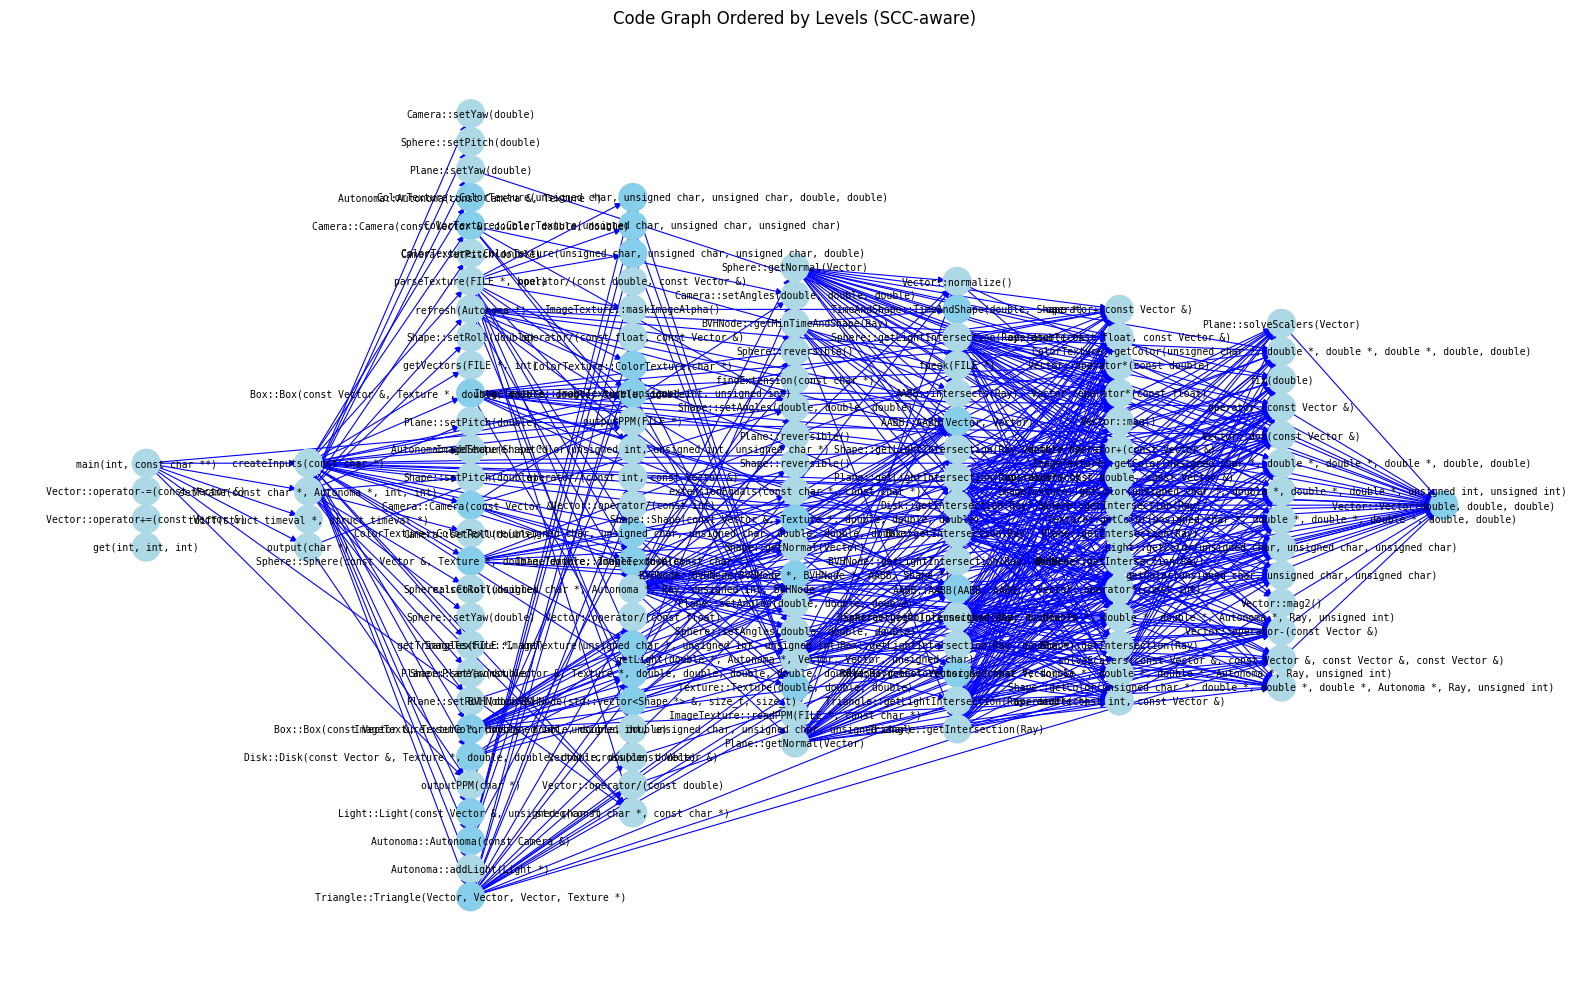

In [2]:
analyzer.plot(horizontal=True, node_filter=lambda node, attrs: (len(list(analyzer.predecessors(node))) != 0 or node == 'main(int, const char **)') 
              and is_kind(attrs["kind"], NodeKind.IN_CODEBASE) and is_kind(attrs["kind"], NodeKind.FUNCTION))
# neural training law

In [3]:
for node in analyzer.nodes():
    if is_kind(analyzer.nodes[node]["kind"], NodeKind.FUNCTION):
        if 'missed_optimizations' in analyzer.nodes[node]:
            print(node)
            missed = analyzer.nodes[node]['missed_optimizations']
            for i in range(len(missed)):
                if i in missed:
                    print(f"  {i}. {missed[i]}")
            print("======================")

Vector::operator*=(const double)
  0. {'virtual registers copies  total copies cost generated in function'}
Vector::operator*=(const float)
  0. {'virtual registers copies  total copies cost generated in function'}
Vector::operator*=(const int)
  0. {'virtual registers copies  total copies cost generated in function'}
Vector::operator/=(const double)
  0. {'virtual registers copies  total copies cost generated in function'}
Vector::operator/=(const float)
  0. {'virtual registers copies  total copies cost generated in function'}
Vector::operator/=(const int)
  0. {'virtual registers copies  total copies cost generated in function'}
Vector::operator+(const Vector &)
  0. {'virtual registers copies  total copies cost generated in function'}
  1. {'List vectorization was possible but not beneficial with cost  >=', 'failed to move load with loop-invariant address because the loop may invalidate its value', 'Cannot SLP vectorize list: vectorization was impossible with available vectorizatio

In [2]:
%load_ext autoreload
%autoreload all

Vector Sphere::getNormal(Vector point){
   Vector vect = point-center;
/*   A x B = <x, y, z>
<ay bz- az by,  bz ax - az bx, ax by - bx ay>
az = 0

<ay bz,  bz ax, ax by - bx ay >

bx = 0

<ay bz,  bz ax, ax by >

ax = 1

<ay bz,  bz , by >

B: <0, z, -y>
A <-1,x/y,0>
*/
if(normalMap==NULL)
      return vect;
     double data3 = (center.y-point.y+radius)/(2*radius);
     double data2 = atan2( point.z-center.z, point.x-center.x);
     vect = vect.normalize();
     Vector right = Vector(vect.x, vect.z, -vect.y);
     Vector up = Vector(vect.z, vect.y, -vect.x);
      double am, ref, op;
      unsigned char norm[3];
      normalMap->getColor(norm, &am, &op, &ref, fix(((mapOffX+mapOffX)+data2)/M_TWO_PI/mapX),fix(((mapOffY+mapOffY)/M_TWO_PI-data3)/mapY));
      return ((norm[0]-128)*right+(norm[1]-128)*up+norm[2]*vect).normalize();
}

Graph is not a DAG; using condensation.


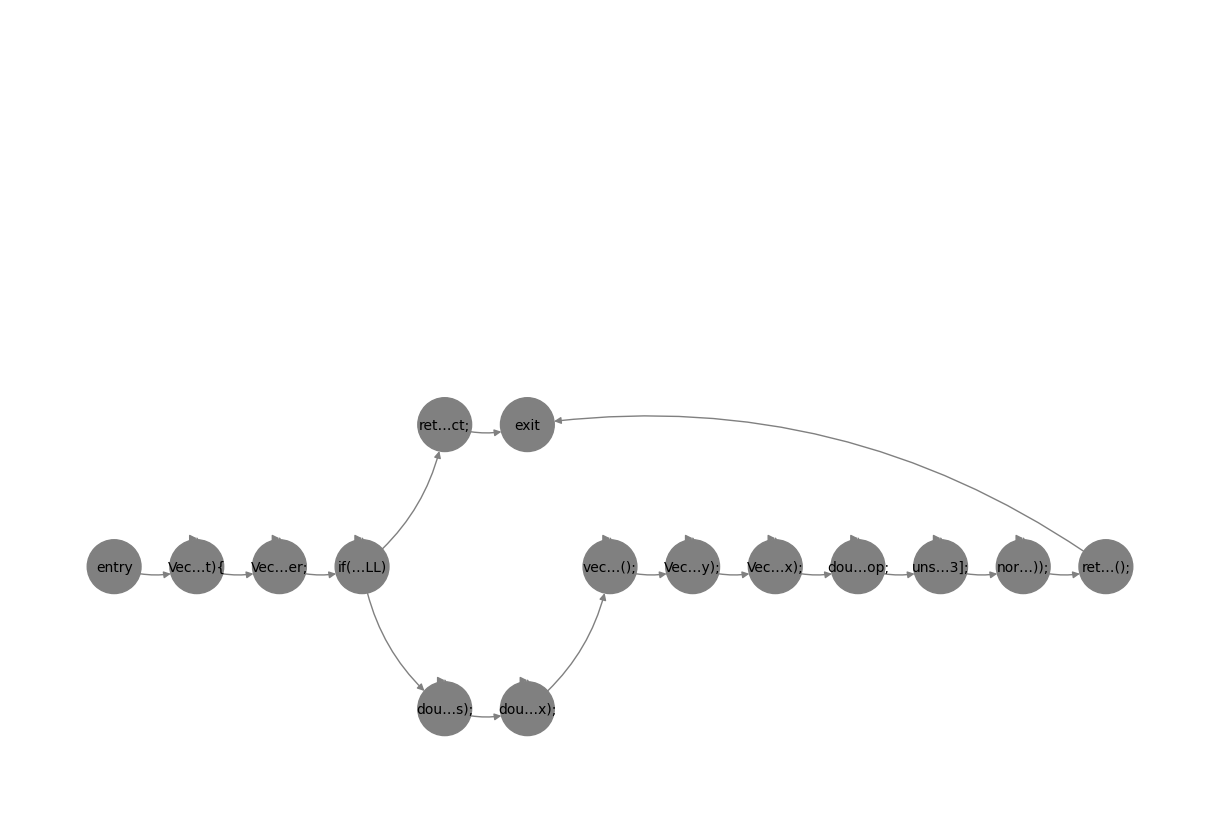

In [11]:
from analyzers.control_flow import ControlFlowGraph
node = 'Sphere::getNormal(Vector)'
cfg = ControlFlowGraph(analyzer.nodes[node]['cursor'], file=analyzer.get_file(analyzer.nodes[node]['file']))
# print(cfg.cognitive_complexity())
# print(cfg.cyclomatic_complexity())
print(analyzer.nodes[node]['code'])
cfg.plot_dag_horizontal_level()

Vector Sphere::getNormal(Vector point){
   Vector vect = point-center;
/*   A x B = <x, y, z>
<ay bz- az by,  bz ax - az bx, ax by - bx ay>
az = 0

<ay bz,  bz ax, ax by - bx ay >

bx = 0

<ay bz,  bz ax, ax by >

ax = 1

<ay bz,  bz , by >

B: <0, z, -y>
A <-1,x/y,0>
*/
if(normalMap==NULL)
      return vect;
     double data3 = (center.y-point.y+radius)/(2*radius);
     double data2 = atan2( point.z-center.z, point.x-center.x);
     vect = vect.normalize();
     Vector right = Vector(vect.x, vect.z, -vect.y);
     Vector up = Vector(vect.z, vect.y, -vect.x);
      double am, ref, op;
      unsigned char norm[3];
      normalMap->getColor(norm, &am, &op, &ref, fix(((mapOffX+mapOffX)+data2)/M_TWO_PI/mapX),fix(((mapOffY+mapOffY)/M_TWO_PI-data3)/mapY));
      return ((norm[0]-128)*right+(norm[1]-128)*up+norm[2]*vect).normalize();
}



/home/ayuram/pesquared/analyzers/data_flow.py:131: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


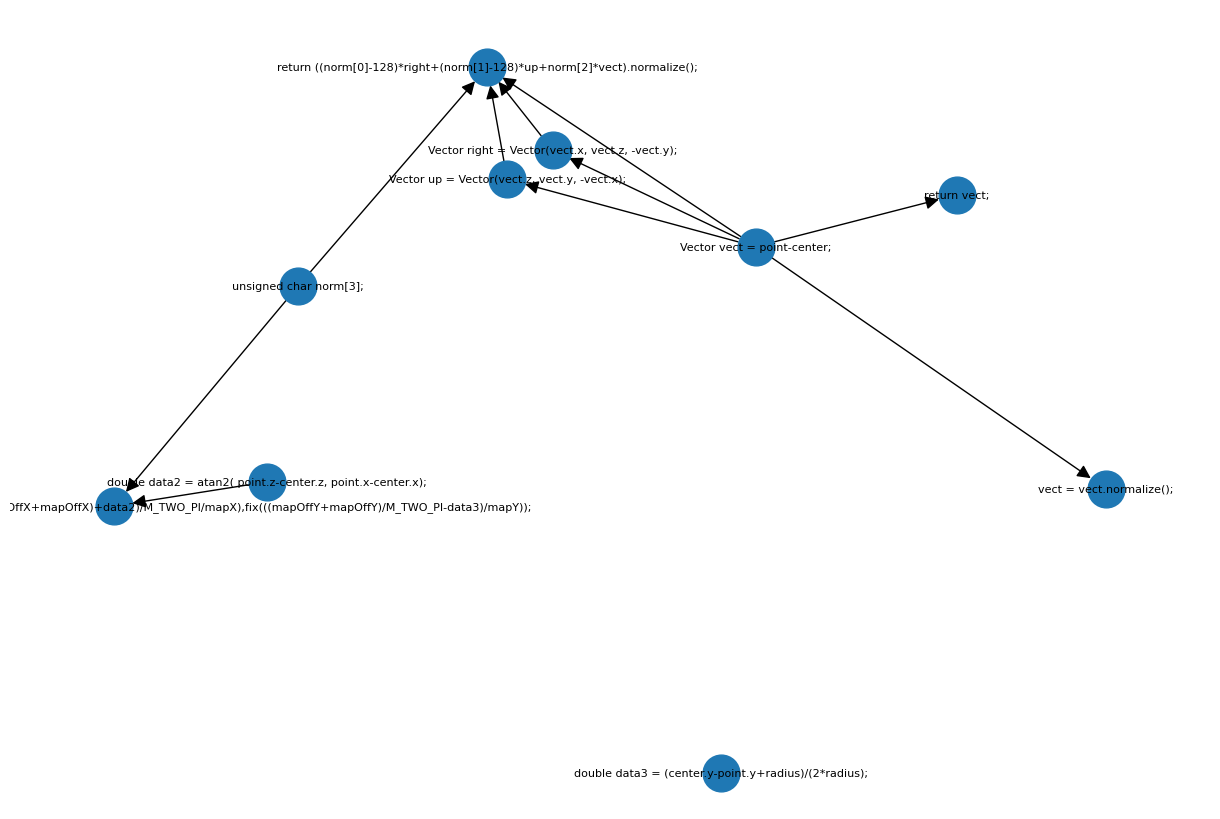

In [3]:
from analyzers.data_flow import DataFlowGraph
node = 'Sphere::getNormal(Vector)'
cfg = DataFlowGraph(analyzer.nodes[node]['cursor'], file=analyzer.get_file(analyzer.nodes[node]['file']))
# print(cfg.cognitive_complexity())
# print(cfg.cyclomatic_complexity())
print(analyzer.nodes[node]['code'])
cfg.plot()

In [11]:
from analyzers.slicer import CppSlicer
node = 'calcColor(unsigned char *, Autonoma *, Ray, unsigned int, BVHNode *)'
slicer = CppSlicer(analyzer.nodes[node]['cursor'], analyzer.get_file(analyzer.nodes[node]['file']))
sliced_code = slicer.get_slice(107)
print(sliced_code)

void calcColor(unsigned char* toFill, Autonoma* c, Ray ray, unsigned int depth, BVHNode* bvh){
   getLight(lightData, c, intersect, rawNormal, minShape->reversible());
   if (depth < c->depth && (opacity < 1.0 - 1e-6 || reflection > 1e-6)) {
       if (opacity < 1.0 - 1e-6) {
           Ray nextRay(intersect + ray.vector * 1e-4, ray.vector);
       }
       if (reflection > 1e-6) {
           Vector nrm = rawNormal.normalize();
           double dotVal = nrm.dot(ray.vector);
           Vector reflectVec = ray.vector - (2.0 * dotVal) * nrm;
           Ray nextRay(intersect + reflectVec * 1e-4, reflectVec);
       }
   }
}



In [6]:
from analyzers.stack_analyzer import StackAnalyzer, FunctionStats

stack_analyzer = StackAnalyzer(f'{PROJECT_DIR}/perfstacks')
stats = stack_analyzer.get_top_functions(7)
for stat in stats:
    corresponding_signatures = analyzer.symbol_to_signatures.get(stat.name, [])
    if len(corresponding_signatures) == 1:
        print(f"Function: {stat.name}, Signature: {corresponding_signatures[0]}, Calls: {stat.exclusive_time}, Chain: {stat.call_chain}")
    elif len(corresponding_signatures) > 1:
        print(f"Warning - multiple signatures found for function: {stat.name}")
        print(f"Function: {stat.name}, Signatures: {', '.join(corresponding_signatures)}, Calls: {stat.exclusive_time}")

Function: Vector::dot, Signature: Vector::dot(const Vector &), Calls: 1629005763, Chain: ['_start', 'main', 'setFrame', 'refresh', 'calcColor', 'BVHNode::getMinTimeAndShape', 'Plane::getIntersection', 'Vector::dot']
Function: BVHNode::getMinTimeAndShape, Signature: BVHNode::getMinTimeAndShape(Ray), Calls: 1533427828, Chain: ['_start', 'main', 'setFrame', 'refresh', 'calcColor', 'BVHNode::getMinTimeAndShape']
Function: Vector::Vector, Signature: Vector::Vector(double, double, double), Calls: 1323788368, Chain: ['_start', 'main', 'setFrame', 'refresh', 'calcColor', 'getLight', 'Box::getLightIntersection', 'Vector::operator+', 'Vector::Vector']
Function: AABB::intersects, Signature: AABB::intersects(Ray), Calls: 1160679654, Chain: ['_start', 'main', 'setFrame', 'refresh', 'calcColor', 'BVHNode::getMinTimeAndShape', 'AABB::intersects']
Function: Box::getLightIntersection, Signature: Box::getLightIntersection(Ray, double *), Calls: 857722366, Chain: ['_start', 'main', 'setFrame', 'refresh',

## Obfuscation

In [10]:
from obfuscators.code_obfuscator import CodeObfuscator
import random
import textwrap
from utils.string_utils import remove_comments

function_nodes = [node for node, attrs in analyzer.nodes(data=True) if is_kind(attrs["kind"], NodeKind.FUNCTION) and is_kind(attrs["kind"], NodeKind.IN_CODEBASE)]
random_node = random.choice(list(function_nodes))
successors = list(analyzer.successors(random_node))
nodes = [analyzer.nodes[n] for n in successors]
nodes.append(analyzer.nodes[random_node])

obfuscator = CodeObfuscator(tier=3, nodes=nodes, project_root=PROJECT_DIR)

code = "\n".join(n["code"] for n in nodes)

obfuscated_code = obfuscator.obfuscate(code)
deobfuscated_code = obfuscator.deobfuscate(obfuscated_code)

print("\nOriginal code:")
print(textwrap.indent(code, "  "))

print("\nObfuscated code:")
print(textwrap.indent(obfuscated_code, "  "))

print("\nObfuscation map:")
for orig, obf in obfuscator.obfuscation_map.items():
    print(f"  {orig} -> {obf}")

if remove_comments(deobfuscated_code) == remove_comments(code):
    print("\n✅ Deobfuscation successful!")
else:
    print("\n❌ Deobfuscation failed.")
    # print the deobfuscated code
    print(textwrap.indent(deobfuscated_code, "  "))
    


Original code:
  __MATHCALL_VEC (sin,, (_Mdouble_ __x));
  inline _GLIBCXX_CONSTEXPR long double
    sin(long double __x)
    { return __builtin_sinl(__x); }

  template<typename _Tp>
      inline _GLIBCXX_CONSTEXPR
      typename __gnu_cxx::__enable_if<__is_integer<_Tp>::__value, 
                                      double>::__type
      sin(_Tp __x)
      { return __builtin_sin(__x); }

  inline _GLIBCXX_CONSTEXPR float
    sin(float __x)
    { return __builtin_sinf(__x); }

  double sinfn(double x, double from, double to) {
     return (to - from) * sin(x * 6.28) + from;
  }


Obfuscated code:
  __MATHCALL_VEC (o_oncos,, (_Mdouble_ __x));
  inline _GLIBCXX_CONSTEXPR long double
    o_oncos(long double __x)
    { return __builtin_sinl(__x); }

  template<typename _Tp>
      inline _GLIBCXX_CONSTEXPR
      typename __gnu_cxx::__enable_if<__is_integer<_Tp>::__value, 
                                      double>::__type
      o_oncos(_Tp __x)
      { return __builtin_sin(__x); }

  

## Optimization

In [ ]:
from optimizers.repo_optimizer import RepoOptimizer

optimizer = RepoOptimizer('gemini-1.5-flash', 'google', analyzer)
optimizer.optimize_repo()

/home/ayuram/pesquared/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package words to /home/ayuram/nltk_data...
[nltk_data]   Package words is already up-to-date!


Optimizing Vector::dot
--- RAW RESPONSE ---
{"insights": "The original `Vector::dot` function is already quite efficient.  However, we can explore potential improvements by considering compiler optimizations and data layout.  Modern compilers are very good at optimizing simple calculations like this, but we can help them by ensuring the data is laid out in a way that's cache-friendly.  We'll also explore using intrinsics for potential further speedups, especially on architectures that support SIMD (Single Instruction, Multiple Data).", "optimizations": [{"brief_description": "Improved data layout and potential use of SIMD intrinsics.", "function_name": "Vector::dot", "new_imports": "#include <immintrin.h> // For AVX intrinsics (if available)", "new_objects": "// NO CHANGES NEEDED", "rewritten_function": "double Vector::dot(const Vector& a) const {\n  // Try to align Vector struct to 16 or 32 bytes to improve cache utilization\n  // This might require compiler specific attributes or str

## $\text{Optimization}^2$

In [12]:
from utils.string_utils import markdown_to_dict, extract_markdown_blocks

def parse_diff(diff_text):
    """Parse a unified diff string into a list of hunks."""
    hunks = []
    current_hunk = []
    for line in diff_text.splitlines():
        if line.startswith('@@'):
            if current_hunk:
                hunks.append(current_hunk)
            current_hunk = [line]
        else:
            current_hunk.append(line)
    if current_hunk:
        hunks.append(current_hunk)
    return hunks

def parse_hunk_simple(hunk_lines):
    """Parse a hunk into leading context, trailing context, remove count, and add lines."""
    leading_context = []
    trailing_context = []
    remove_count = 0
    add_lines = []
    in_change = False
    for line in hunk_lines:
        if line.startswith(' '):
            if not in_change:
                leading_context.append(line[1:])
            else:
                trailing_context.append(line[1:])
        elif line.startswith('-'):
            in_change = True
            remove_count += 1
        elif line.startswith('+'):
            in_change = True
            add_lines.append(line[1:])
    return leading_context, trailing_context, remove_count, add_lines

def apply_hunk_fuzzy_simple(hunk_lines, corpus):
    """Apply a single hunk to the corpus fuzzily using context matching."""
    leading_context, trailing_context, remove_count, add_lines = parse_hunk_simple(hunk_lines)
    C_lead = len(leading_context)
    C_trail = len(trailing_context)
    
    # Skip if no context is provided to anchor the changes
    if C_lead == 0 and C_trail == 0:
        return
    
    # Search for the best position to apply the hunk
    best_score = -1
    best_i = -1
    max_pos = len(corpus) - C_lead - remove_count - C_trail + 1
    for i in range(max_pos if max_pos > 0 else 0):
        # Calculate similarity score for leading context
        score_lead = sum(1 for a, b in zip(corpus[i:i + C_lead], leading_context) if a == b)
        # Calculate similarity score for trailing context
        score_trail = sum(1 for a, b in zip(
            corpus[i + C_lead + remove_count:i + C_lead + remove_count + C_trail],
            trailing_context
        ) if a == b)
        score = score_lead + score_trail
        if score > best_score:
            best_score = score
            best_i = i
    
    # Apply the changes if a suitable position is found
    if best_i != -1:
        start_remove = best_i + C_lead
        end_remove = start_remove + remove_count
        del corpus[start_remove:end_remove]
        corpus[start_remove:start_remove] = add_lines

def apply_diff_fuzzy(corpus, diff_text):
    """
    Apply a diff with potentially inaccurate hunks to a corpus fuzzily.
    
    Args:
        corpus (list of str): The original text as a list of lines.
        diff_text (str): The diff in unified diff format.
    
    Returns:
        list of str: The modified corpus after applying the diff.
    """
    hunks = parse_diff(diff_text)
    for hunk in hunks:
        apply_hunk_fuzzy_simple(hunk, corpus)
    return corpus

# Example usage:

    # Sample corpus
file = analyzer.nodes[random_node]['file']
with open(file, 'r') as f:
    corpus = f.readlines()
corpus = analyzer.nodes[random_node]['code'].splitlines()
# Sample diff with one hunk
diff_text = extract_markdown_blocks(resp_dict['function'])[0]
# Apply the diff
modified_corpus = apply_diff_fuzzy(corpus, diff_text)
print("\n".join(modified_corpus))

NameError: name 'resp_dict' is not defined